<a href="https://colab.research.google.com/github/brahmapearl/HumanPortraitClassificationVGG16/blob/main/HumanPortraitClassificationVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/binary.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPool2D
from keras.applications.vgg16 import VGG16

In [5]:
# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 16


In [6]:
data_dir = '/content/binary'

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [8]:

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 35367 images belonging to 2 classes.
Found 8841 images belonging to 2 classes.


In [9]:
# Load pre-trained VGG-16 model
vgg16_model = VGG16(input_shape=(224,224, 3))

553467096/553467096 [==============================] - 2s 0us/step


In [10]:
# Add custom layers for classification
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

# Freeze pre-trained layers
for layer in vgg16_model.layers:
   layer.trainable = False

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 138,358,545
Trainable params: 1,001
Non-trainable params: 138,357,544
_________________________________________________________________


In [12]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
H = model.fit(train_data,validation_data=val_data,epochs=20,verbose=1,shuffle=True)

Epoch 1/20
10/10 [==============================] - 132s 15s/step - loss: 0.6829 - accuracy: 0.6156 - val_loss: 0.6806 - val_accuracy: 0.6575
Epoch 2/20
10/10 [==============================] - 111s 12s/step - loss: 0.6825 - accuracy: 0.6438 - val_loss: 0.6804 - val_accuracy: 0.6753
Epoch 3/20
10/10 [==============================] - 111s 12s/step - loss: 0.6843 - accuracy: 0.5844 - val_loss: 0.6802 - val_accuracy: 0.7030
Epoch 4/20
10/10 [==============================] - 146s 16s/step - loss: 0.6807 - accuracy: 0.6719 - val_loss: 0.6799 - val_accuracy: 0.7145
Epoch 5/20
10/10 [==============================] - 110s 12s/step - loss: 0.6806 - accuracy: 0.6562 - val_loss: 0.6797 - val_accuracy: 0.7265
Epoch 6/20
10/10 [==============================] - 110s 12s/step - loss: 0.6788 - accuracy: 0.6875 - val_loss: 0.6794 - val_accuracy: 0.7244
Epoch 7/20
10/10 [==============================] - 110s 12s/step - loss: 0.6781 - accuracy: 0.7156 - val_loss: 0.6794 - val_accuracy: 0.7029
Epoch 

In [15]:
hist = H.history

In [16]:
model.evaluate(val_data )

277/277 [==============================] - 126s 455ms/step - loss: 0.6766 - accuracy: 0.6075


[0.6766061186790466, 0.6075104475021362]

Text(0, 0.5, 'accuracy')

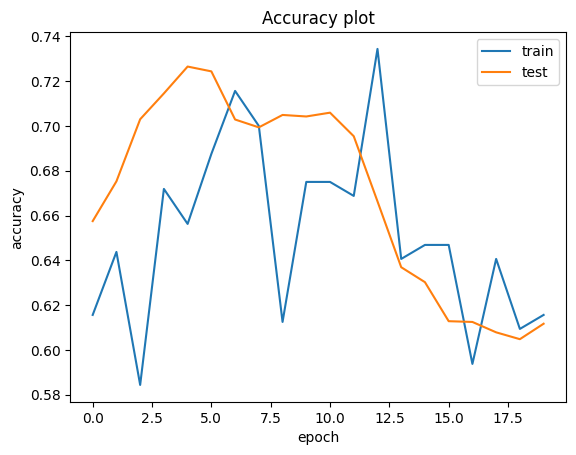

In [17]:
import matplotlib.pyplot as plt 
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

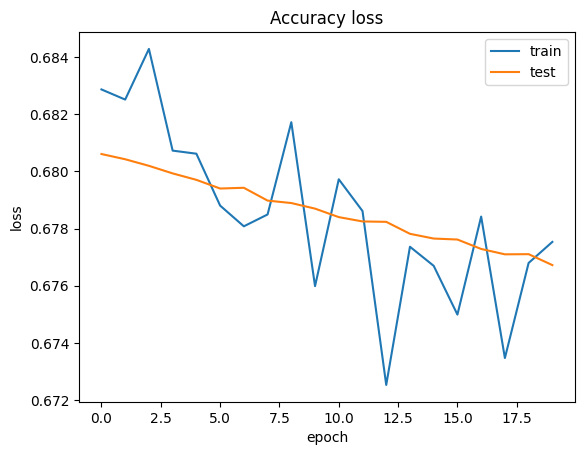

In [18]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [19]:

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)


Found 8841 images belonging to 2 classes.
277/277 [==============================] - 116s 417ms/step


In [20]:
predicted_labels = model.predict(test_data)

277/277 [==============================] - 113s 407ms/step


In [21]:
predicted_label_index = np.argmax(predicted_labels, axis=None)

In [22]:
predicted_labels_rounded = ((np.rint(predicted_labels.ravel())).astype(int))

In [23]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

277/277 [==============================] - 113s 406ms/step - loss: 0.6767 - accuracy: 0.6086
Test Loss: 0.676652193069458
Test Accuracy: 0.6086415648460388


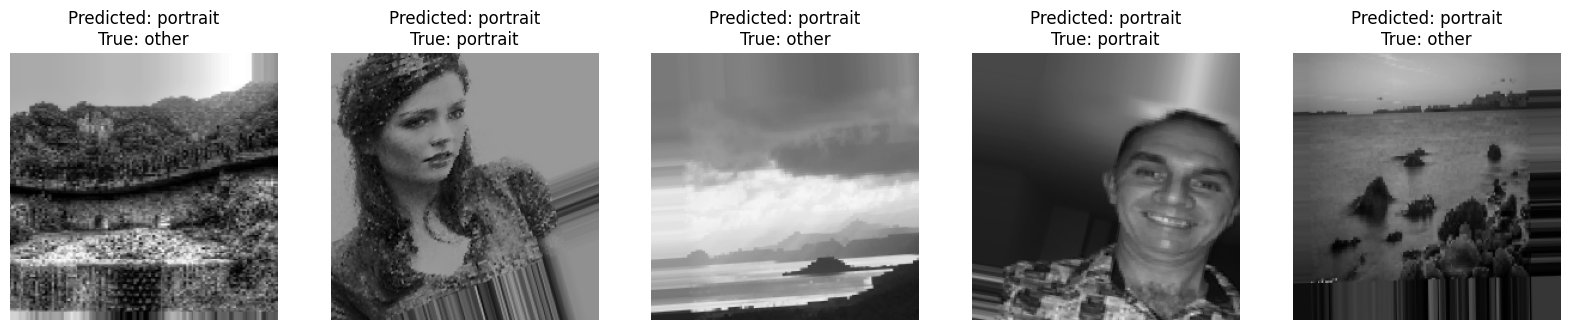

In [24]:
import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]


# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels_rounded]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [26]:
from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels_rounded))
true_labels = true_labels[:num_samples]
predicted_labels_rounded = predicted_labels_rounded[:num_samples]

# Generate the classification report
print(classification_report(true_labels, predicted_labels_rounded))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.48      0.82      0.61        17

    accuracy                           0.44        32
   macro avg       0.24      0.41      0.30        32
weighted avg       0.26      0.44      0.32        32



In [29]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels_rounded)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0 15]
 [ 3 14]]
